In [1]:
#Nama : Hurin Salimah
#NIM : 1103200021

# Impor library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.metrics import davies_bouldin_score

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Path ke file dataset CSV di Google Drive Anda
file_path = '/content/drive/MyDrive/machine learning/Player_Match.csv'

# Membaca dataset CSV menjadi dataframe
df = pd.read_csv(file_path)

# Sekarang df adalah dataframe yang berisi data dari dataset
# Anda dapat melakukan operasi dan analisis data lebih lanjut dengan dataframe ini

In [4]:
print(df)
df.columns

       Match_Id  Player_Id  Team_Id  Is_Keeper  Is_Captain
0        335987          1        1          0           1
1        335987          2        1          0           0
2        335987          3        1          0           0
3        335987          4        1          0           0
4        335987          5        1          0           0
...         ...        ...      ...        ...         ...
12689    829762        401        2          0           0
12690    829762        311        2          0           0
12691    829762        378        2          0           0
12692    829762        140        2          0           0
12693    829762        296        2          0           0

[12694 rows x 5 columns]


Index(['Match_Id', 'Player_Id', 'Team_Id', 'Is_Keeper', 'Is_Captain'], dtype='object')

In [7]:
# Mengubah nama atribut dalam dataframe
df = df.rename(columns={
    "Player_Id": "Player_Indian",
    "Team_Id": "Team_Indian"
})

In [8]:
# Menghapus kolom "CustomerID" dan "Gender" dari dataframe
df = df.drop(columns=["Is_Captain", "Is_Keeper"])
df.head()

,Match_Id,Player_Indian,Team_Indian
0,335987,1,1
1,335987,2,1
2,335987,3,1
3,335987,4,1
4,335987,5,1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

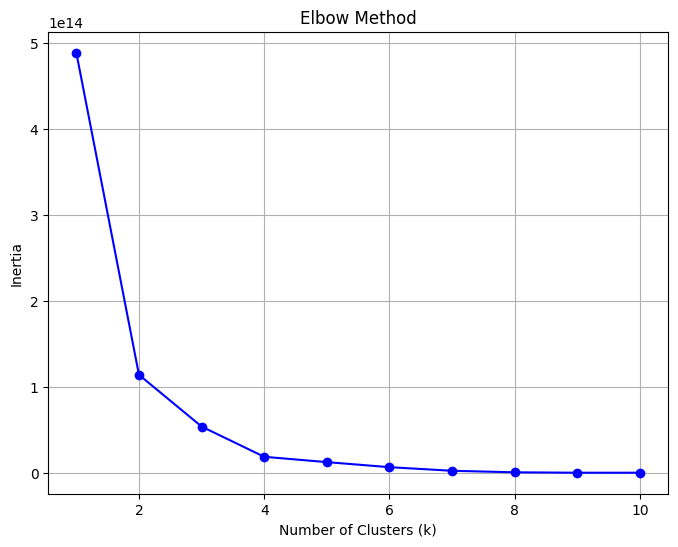

In [10]:
# Pilih atribut yang akan digunakan dalam analisis klaster
attributes = df[['Match_Id', 'Player_Indian', 'Team_Indian']]

# Inisialisasi daftar untuk menyimpan inertia (sum squared distances) untuk setiap k
inertia = []

# Mencoba jumlah klaster (k) dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(attributes)
    inertia.append(kmeans.inertia_)

# Memvisualisasikan elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


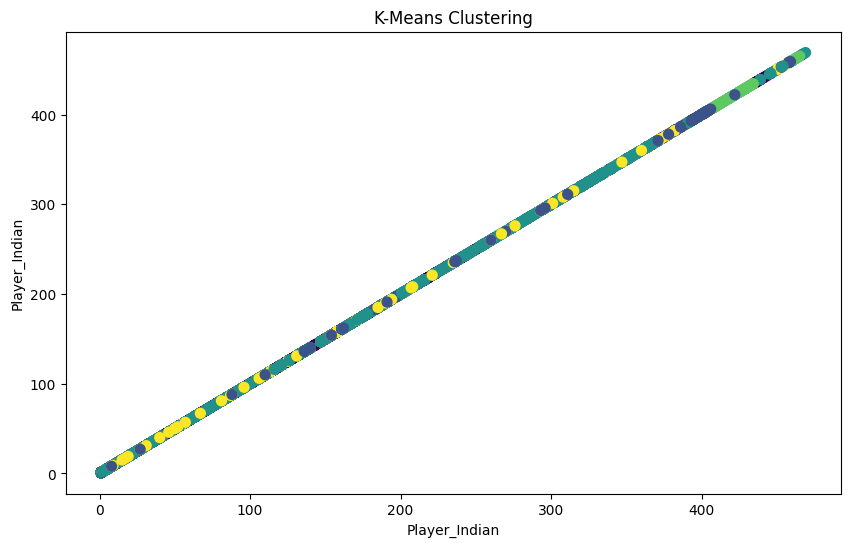

In [13]:
# Pilih atribut yang akan digunakan dalam K-Means Clustering
attributes = df[['Match_Id', 'Player_Indian', 'Team_Indian']]

# Membuat model K-Means Clustering dengan 5 klaster
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(attributes)

# Menambahkan kolom 'label' ke dataframe df
df['label'] = kmeans.labels_

# Memvisualisasikan hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(df['Player_Indian'], df['Player_Indian'], c=df['label'], cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Player_Indian')
plt.ylabel('Player_Indian')
plt.show()

In [14]:
# Inisialisasi sebuah dictionary untuk menyimpan nilai Silhouette Score
silhouette_scores = {}

# Coba jumlah klaster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(attributes)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(attributes, labels)
    silhouette_scores[k] = silhouette_avg

# Menampilkan hasil Silhouette Score untuk masing-masing k
for k, score in silhouette_scores.items():
    print(f'Silhouette Score for k={k}: {score:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for k=2: 0.6981
Silhouette Score for k=3: 0.6962
Silhouette Score for k=4: 0.7582
Silhouette Score for k=5: 0.8046
Silhouette Score for k=6: 0.8241
Silhouette Score for k=7: 0.8640
Silhouette Score for k=8: 0.9552
Silhouette Score for k=9: 0.9955
Silhouette Score for k=10: 0.9944


In [15]:
# Inisialisasi sebuah list untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = []

# Coba jumlah klaster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(attributes)
    labels = kmeans.labels_
    dbi = davies_bouldin_score(attributes, labels)
    dbi_scores.append(dbi)

# Menampilkan hasil Davies-Bouldin Index untuk masing-masing k
for k, score in zip(range(2, 11), dbi_scores):
    print(f'Davies-Bouldin Index for k={k}: {score:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2: 0.4619
Davies-Bouldin Index for k=3: 0.4006
Davies-Bouldin Index for k=4: 0.3403
Davies-Bouldin Index for k=5: 0.2301
Davies-Bouldin Index for k=6: 0.2242
Davies-Bouldin Index for k=7: 0.2007
Davies-Bouldin Index for k=8: 0.0996
Davies-Bouldin Index for k=9: 0.0124
Davies-Bouldin Index for k=10: 0.0130
